In [370]:
# 필요한 라이브러리 호출

# 기초
import numpy as np
import pandas as pd
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly import express as px

# 사이킷런 분류
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 지도학습

# 회귀 종류
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 분류 종류
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree



# 비지도학습
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 
# 평가용
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [371]:
import matplotlib.pyplot as plt
# 한글화 작업
plt.rc('font', family='NanumBarunGothic') 

In [372]:
plt.rcParams['font.family'] = 'NanumGothic'

In [373]:
# 잠깐 시각화
plt.figure(figsize=(12,7))

sns.countplot(data=train.head(6).sort_values(by = '품목 번호', ascending = True))

<AxesSubplot:ylabel='count'>

In [374]:
df_19 = pd.read_csv('C:/myPyCode/data/2021_물가/생필품 농수축산물 가격 정보(2019년).csv', encoding = 'cp949')
df_19

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1496335,116,홈플러스 시흥점,311,오이(다다기),1개,1190,2019-12,국산,2,대형마트,545000,금천구,2019-12-30
1,1499702,115,남문시장,202,돼지고기(생삼겹살),1등급(600g),12500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
2,1503366,115,남문시장,310,상추(100g),1개,800,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
3,1499701,115,남문시장,58,"쇠고기(한우,불고기)",1등급(600g),23000,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
4,1503365,115,남문시장,309,양파(1.5kg망),1개,2500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113487,1359195,202,구로시장,312,애호박,1개,1500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
113488,1357693,73,뚝도시장,306,"배(신고, 600g)",1개,3900,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28
113489,1359189,202,구로시장,306,"배(신고, 600g)",1개,3500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
113490,1357694,73,뚝도시장,307,배추(2.5~3kg),1포기,2500,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28


In [375]:
df_21 = pd.read_csv('C:/myPyCode/data/2021_물가/생필품_농수축산물_가격_정보(2021년).csv', encoding = 'cp949')
df_21

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89894,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89895,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
89896,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
89897,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30


In [376]:
df_20 = pd.read_csv('C:/myPyCode/data/2021_물가/생필품 농수축산물 가격 정보(2020년).csv', encoding = 'cp949')
df_20

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1621162,1,통인시장,309,양파(1.5kg망),1kg,2000,2020-12,"국내산,무안",1,전통시장,110000,종로구,2020-12-21
1,1628949,228,방배종합시장,277,호박,1개268g,1500,2020-12,국내산/인큐베이터,1,전통시장,650000,서초구,2020-12-21
2,1626799,51,NC백화점 불광점,18,닭고기,1마리(1kg),8990,2020-12,올품 토종,2,대형마트,380000,은평구,2020-12-21
3,1630920,223,홈플러스 목동점,278,쇠고기,600g,35982,2020-12,국내산(음성)농협,2,대형마트,470000,양천구,2020-12-21
4,1622882,1,통인시장,309,양파(1.5kg망),1kg,2000,2020-12,"국내산,무안",1,전통시장,110000,종로구,2020-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117447,1509343,68,롯데백화점 미아점,306,"배(신고, 600g)",1개,4000,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23
117448,1509368,206,하나로클럽 미아점,99,돼지고기(생삼겹살),600g,9300,2020-01,100g 1550,2,대형마트,305000,강북구,2020-01-23
117449,1509346,68,롯데백화점 미아점,309,양파(1.5kg망),1.5kg,3980,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23
117450,1509369,206,하나로클럽 미아점,275,닭고기(중간),1마리,4670,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23


In [377]:
df_one = pd.merge(df_19, df_20, how = 'outer')

In [378]:
df_two = pd.merge(df_one, df_21, how = 'outer')

In [379]:
df = df_two
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1496335,116,홈플러스 시흥점,311,오이(다다기),1개,1190,2019-12,국산,2,대형마트,545000,금천구,2019-12-30
1,1499702,115,남문시장,202,돼지고기(생삼겹살),1등급(600g),12500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
2,1503366,115,남문시장,310,상추(100g),1개,800,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
3,1499701,115,남문시장,58,"쇠고기(한우,불고기)",1등급(600g),23000,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
4,1503365,115,남문시장,309,양파(1.5kg망),1개,2500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320838,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
320839,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
320840,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
320841,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320843 entries, 0 to 320842
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               320843 non-null  int64 
 1   시장/마트 번호           320843 non-null  int64 
 2   시장/마트 이름           320843 non-null  object
 3   품목 번호              320843 non-null  int64 
 4   품목 이름              320787 non-null  object
 5   실판매규격              320843 non-null  object
 6   가격(원)              320843 non-null  int64 
 7   년도-월               320843 non-null  object
 8   비고                 253682 non-null  object
 9   시장유형 구분(시장/마트) 코드  320843 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  320843 non-null  object
 11  자치구 코드             320843 non-null  int64 
 12  자치구 이름             320843 non-null  object
 13  점검일자               320843 non-null  object
dtypes: int64(6), object(8)
memory usage: 36.7+ MB


In [381]:
df.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,3.208430e+05,320843.000000,320843.000000,3.208430e+05,320843.000000,320843.000000
mean,1.556445e+06,103.142671,212.581568,1.346572e+04,1.510072,415991.341560
std,9.823942e+04,68.695718,109.217373,4.227410e+06,0.499899,185545.761174
min,1.357080e+06,1.000000,13.000000,0.000000e+00,1.000000,110000.000000
25%,1.473784e+06,44.000000,119.000000,2.000000e+03,1.000000,260000.000000
50%,1.560484e+06,92.000000,265.000000,3.450000e+03,2.000000,410000.000000
75%,1.641340e+06,146.000000,307.000000,5.950000e+03,2.000000,560000.000000
max,1.724779e+06,229.000000,324.000000,2.394024e+09,2.000000,740000.000000


In [382]:
# 아래부터 시장유형 구분 이름, 자치구 이름, 품목 이름, 시장/마트 이름을 남기기 위해
# 딕셔너리 제작 시작
mart_name = df['시장유형 구분(시장/마트) 코드']
mart_code = df['시장유형 구분(시장/마트) 이름']
mart = {}
for i in range(len(mart_code)):
      mart[mart_code[i]] = mart_name[i]
print(mart)

{'대형마트': 2, '전통시장': 1}


In [383]:
region_name = df['자치구 이름']
region_code = df['자치구 코드']
region = {}
for i in range(len(region_code)):
      region[region_code[i]] = region_name[i]
print(region)

{545000: '금천구', 680000: '강남구', 560000: '영등포구', 740000: '강동구', 410000: '서대문구', 230000: '동대문구', 500000: '강서구', 440000: '마포구', 140000: '중구', 305000: '강북구', 710000: '송파구', 260000: '중랑구', 215000: '광진구', 320000: '도봉구', 590000: '동작구', 170000: '용산구', 470000: '양천구', 290000: '성북구', 650000: '서초구', 530000: '구로구', 620000: '관악구', 350000: '노원구', 110000: '종로구', 200000: '성동구', 380000: '은평구'}


In [384]:
cat_name = df['품목 이름']
cat_code = df['품목 번호']
cat = {}
for i in range(len(cat_code)):
      cat[cat_code[i]] = cat_name[i]
print(cat)

{311: '오이(다다기)', 202: '돼지고기(생삼겹살)', 310: '상추(100g)', 58: '쇠고기(한우,불고기)', 309: '양파(1.5kg망)', 119: '호박(인큐베이터)', 260: '조기(냉동,수입산)', 283: '닭고기(육계)', 171: '달걀(10개)', 320: '달걀(30개)', 136: '조기(국산,생물)', 264: '명태(냉동,수입산)', 318: '고등어(30cm,수입산)', 305: '사과(부사, 300g)', 254: '오징어(생물,국산)', 266: '고등어(생물,국산)', 152: '명태(러시아,냉동)', 306: '배(신고, 600g)', 308: '무(1kg)', 307: '배추(2.5~3kg)', 312: '애호박', 144: '조기(국산,냉동)', 268: '고등어(냉동,국산)', 248: '배(신고),중급(대)', 125: '배추(국산)', 26: '배추', 24: '양파', 25: '무', 276: '배(신고)', 303: '조기', 288: '동태', 23: '상추', 256: '오징어(냉동,국산)', 13: '고등어', 27: '배', 257: '오징어(냉동,수입산)', 52: '돼지고기(삼겹살)', 18: '닭고기', 285: '돼지고기', 131: nan, 50: '사과(부사)', 277: '호박', 138: '닭고기(토종닭)', 99: '돼지고기(생삼겹살)', 244: '사과(부사),중급(대)', 269: '고등어(냉동,수입산)', 259: '조기(냉동,국산)', 271: '배추(중간)', 284: '배(중품)', 22: '오이', 304: '고등어', 314: '냉동참조기(20cm,국산)', 265: '명태(생물,수입산)', 253: '오징어', 302: '명태', 17: '달걀', 278: '쇠고기', 282: '무(세척무)', 175: '배추(중간)', 274: '무(세척무, 중)', 261: '조기(생물,수입산)', 316: '고등어(30cm,국산)', 118: '호박(인큐베이터),중간

In [385]:
market_name = df['시장/마트 이름']
market_code = df['시장/마트 번호']
market = {}
for i in range(len(market_code)):
      market[market_code[i]] = market_name[i]
print(market)

{116: '홈플러스 시흥점', 115: '남문시장', 114: '현대시장', 222: '홈플러스 독산점', 44: '이마트 역삼점', 130: '롯데백화점 영등포점', 154: '홈플러스 강동점', 31: '인왕시장', 88: '롯데백화점 청량리점', 45: '롯데백화점 강남점', 213: '화곡본동시장', 123: '홈플러스 월드컵점', 8: '롯데마트 서울역점', 66: '수유재래시장', 153: '이마트 명일점', 147: '롯데백화점 잠실점', 91: '동원시장', 40: '홈플러스 등촌점', 80: '이마트 자양점', 27: '이마트 창동점', 127: '남성시장', 10: '용문시장', 102: '목3동시장', 214: '이마트 목동점', 90: '우림시장', 13: '돈암제일시장', 217: '방림시장', 120: '망원시장', 151: '암사종합시장', 28: '홈플러스 방학점', 22: '이마트 여의도점', 19: '대림중앙시장', 56: '롯데백화점', 218: '신세계백화점 강남점', 108: '남구로시장', 140: '하나로클럽 양재점', 133: '원당종합시장', 25: '방학동도깨비시장', 33: '현대백화점 신촌점', 11: '남대문시장', 103: '신영시장', 96: '공릉동 도깨비시장', 82: '롯데마트 강변점', 32: '영천시장', 148: '홈플러스 잠실점', 1: '통인시장', 26: '신창시장', 2: '신세계백화점', 129: '태평백화점', 206: '하나로클럽 미아점', 15: '이마트 미아점', 136: '세이브 마트', 94: '홈플러스 면목점', 60: '이마트 청계점', 20: '영등포전통시장', 216: '도곡시장', 145: '마천중앙시장', 134: '신원시장(신림1동)', 21: '홈플러스 영등포점', 207: '관악신사시장(신림4동)', 215: '청담삼익시장', 74: '이마트 왕십리점', 38: '송화시장', 200: '뉴코아아울렛 강남점', 14: '장위골목시장', 6: '이마트 용산점',

In [386]:
# 필요 데이터 확인
df.iloc[:,0:6].sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [387]:
df['가격(원)'].value_counts().head(20) # 가격이 0원인 행 삭제 예정

3000    15383
2000    13706
2500    12974
4000    12420
5000    10549
1000     9691
3500     8389
1500     8247
6000     6038
2980     4436
4500     4094
500      3911
3980     3812
0        3694
1980     3678
6500     3211
5500     3188
4980     3097
2990     2684
3990     2586
Name: 가격(원), dtype: int64

In [388]:
df['품목 이름'].isnull().sum() # 결측치 확인

56

In [389]:
# 아래부터 필요없는 행 제거 예정
# 주의
df.drop(['시장유형 구분(시장/마트) 이름','시장유형 구분(시장/마트) 코드'], axis = 1, inplace = True)

In [390]:
df.drop('자치구 이름',axis=1, inplace = True)
df.drop('시장/마트 이름',axis=1, inplace = True)

In [391]:
df.drop(['점검일자','실판매규격','품목 이름','비고'], axis = 1, inplace = True)

In [392]:
df # drop된 내용 확인

,일련번호,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
0,1496335,116,311,1190,2019-12,545000
1,1499702,115,202,12500,2019-12,545000
2,1503366,115,310,800,2019-12,545000
3,1499701,115,58,23000,2019-12,545000
4,1503365,115,309,2500,2019-12,545000
...,...,...,...,...,...,...
320838,1724775,154,320,6490,2021-12,740000
320839,1724776,154,144,1190,2021-12,740000
320840,1724777,154,264,3490,2021-12,740000
320841,1724778,154,256,4980,2021-12,740000


In [393]:
df['가격(원)'].value_counts().head(20)

3000    15383
2000    13706
2500    12974
4000    12420
5000    10549
1000     9691
3500     8389
1500     8247
6000     6038
2980     4436
4500     4094
500      3911
3980     3812
0        3694
1980     3678
6500     3211
5500     3188
4980     3097
2990     2684
3990     2586
Name: 가격(원), dtype: int64

In [394]:
# 가격이 0원인 행 sort시켜서 다시 선언
df = df.sort_values(by='가격(원)')
df

,일련번호,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
234816,1635144,147,302,0,2021-01,710000
222105,1511343,154,264,0,2020-01,740000
180372,1564232,44,288,0,2020-07,680000
111459,1369939,129,152,0,2019-02,590000
180353,1568989,44,288,0,2020-07,680000
...,...,...,...,...,...,...
148594,1602645,10,256,310000,2020-10,170000
25965,1488498,94,306,403890,2019-11,260000
139423,1601540,223,288,34902990,2020-10,470000
127610,1613426,214,13,35002980,2020-11,470000


In [397]:
# 가격이 0원인 상품 iloc로 삭제
df = df.iloc[3695:,:]
df

,일련번호,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
256035,1656142,20,23,500,2021-04,560000
215227,1532742,14,22,500,2020-04,290000
256036,1656143,20,311,500,2021-04,560000
160226,1577661,1,311,500,2020-08,110000
262288,1662391,26,310,500,2021-05,320000
...,...,...,...,...,...,...
244208,1644451,45,50,210000,2021-02,680000
179632,1575337,40,58,260520,2020-07,500000
92710,1408770,63,58,288200,2019-05,170000
148594,1602645,10,256,310000,2020-10,170000


In [396]:
# 23억, 3500만원 상품 삭제 (에러)
df = df.iloc[:317146]
df

,일련번호,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
25073,1489645,21,202,1,2019-11,560000
70063,1424146,213,119,10,2019-07,500000
261572,1661675,214,312,90,2021-05,470000
243730,1643905,102,25,100,2021-02,470000
65247,1447285,146,310,100,2019-08,710000
...,...,...,...,...,...,...
244208,1644451,45,50,210000,2021-02,680000
179632,1575337,40,58,260520,2020-07,500000
92710,1408770,63,58,288200,2019-05,170000
148594,1602645,10,256,310000,2020-10,170000


In [ ]:
# 데이터의 연도별 
df['년도-월'] = pd.to_datetime(df['년도-월'])
df.info()

In [ ]:
df.isnull().sum() # 결측치 확인

In [334]:
df.sort_values(by = '가격(원)')
df.head(20)

,일련번호,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
25073,1489645,21,202,1,2019-11-01,560000
70063,1424146,213,119,10,2019-07-01,500000
261572,1661675,214,312,90,2021-05-01,470000
98772,1393426,217,23,100,2019-04-01,650000
65247,1447285,146,310,100,2019-08-01,710000
64851,1441153,145,119,100,2019-08-01,710000
34530,1466756,205,310,100,2019-10-01,740000
244482,1672996,102,25,100,2021-02-01,470000
243730,1643905,102,25,100,2021-02-01,470000
87660,1419371,114,311,100,2019-06-01,545000


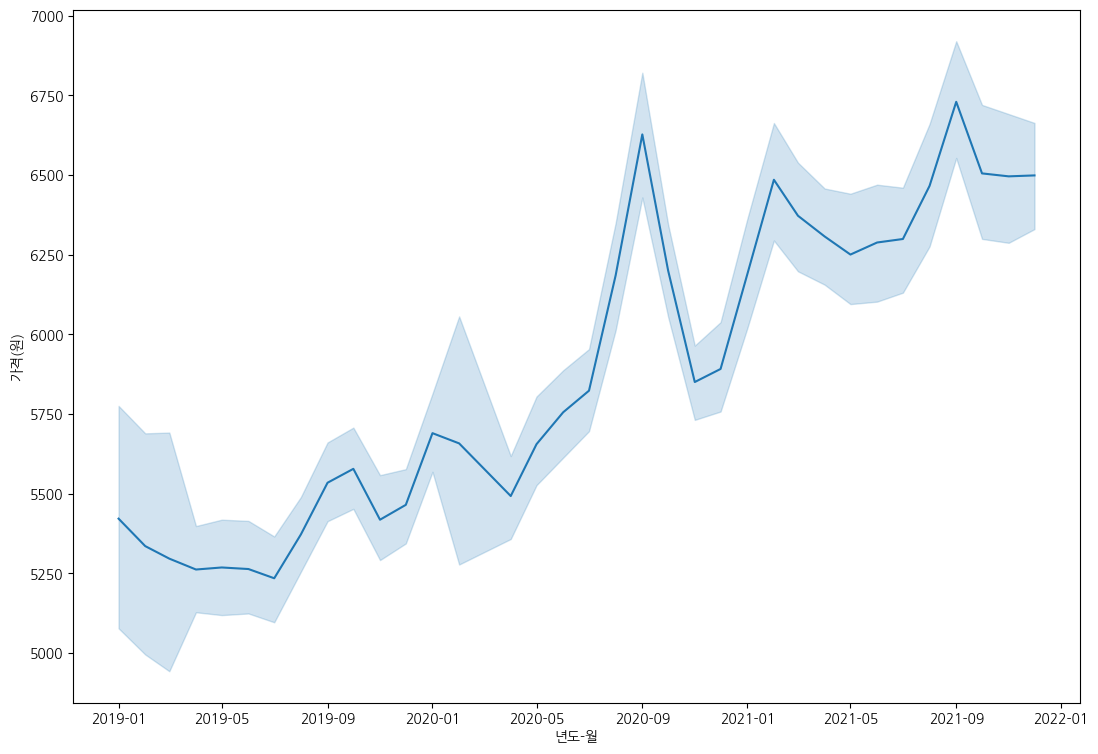

In [352]:
# 연도 - 가격별로 시각화 
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)', palette = 'rainbow')
plt.show()

# 추수 시기(추석)에 농산물 가격이 상승하는 것으로 보임
# 코로나 이전과 이후의 데이터가 차이나는 것으로 확인

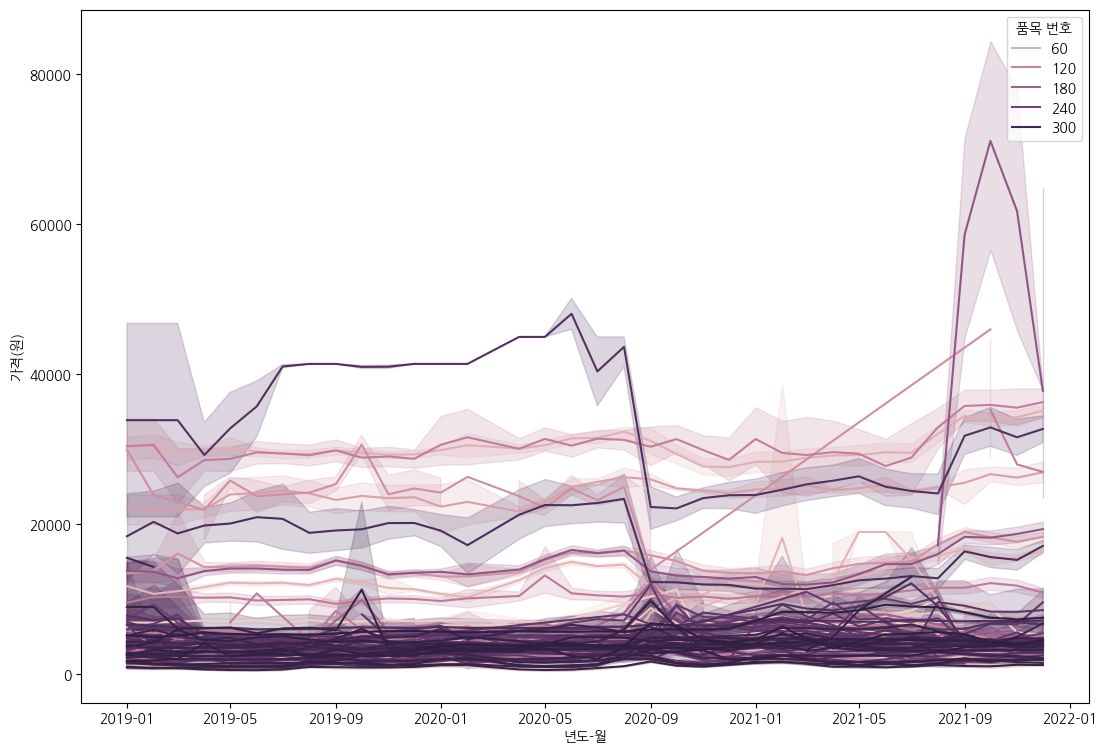

In [347]:
# 연도 - 가격- 품목 번호별로 시각화
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)', hue = '품목 번호')
plt.show()

# 추수 시기(추석)에 농산물 가격이 상승하는 것으로 보임
# 코로나 이전과 이후의 데이터가 차이나는 것으로 확인

In [344]:
df.columns

Index(['일련번호', '시장/마트 번호', '품목 번호', '가격(원)', '년도-월', '자치구 코드'], dtype='object')

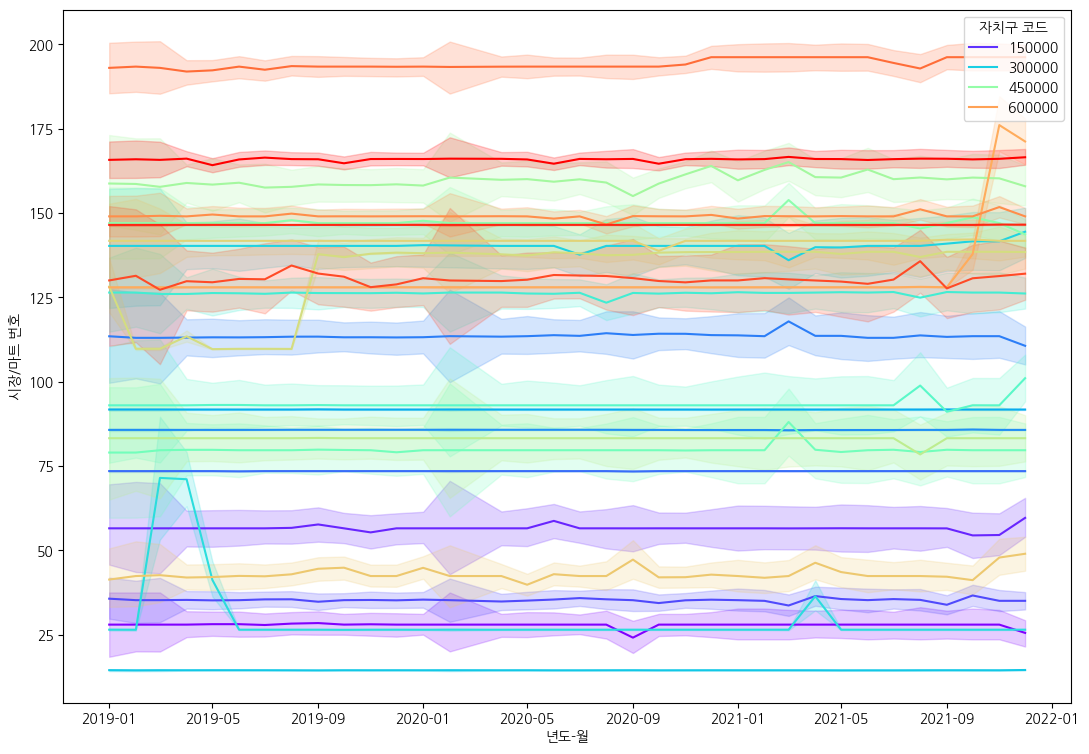

In [355]:
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '시장/마트 번호', hue='자치구 코드', palette='rainbow')
plt.show()

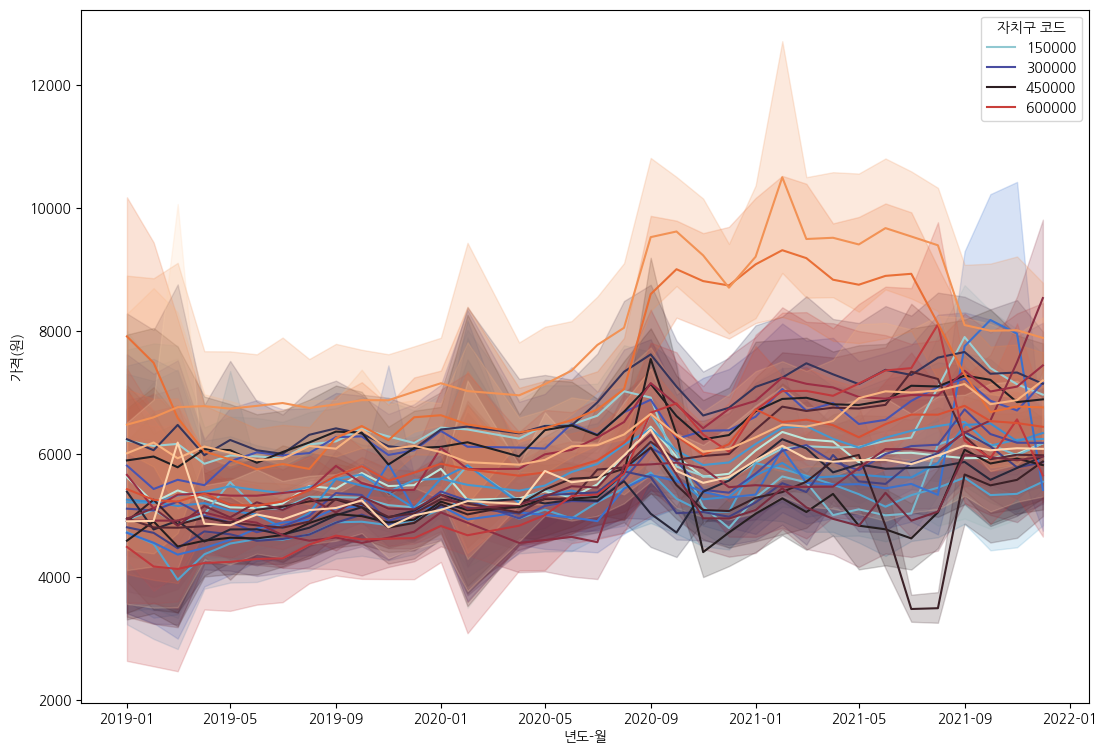

In [351]:
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)', hue='자치구 코드', palette='icefire')
plt.show()

In [368]:
X = df.drop(['가격(원)','년도-월'], axis = 1)
y = df['가격(원)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [362]:
# LightGBM 시도
# 사용할 params정의
params = {"n_estimators" : [100, 500, 1000],"learning_rate" : [0.01, 0.05, 0.1, 0.3]
          ,"lambda_l1" : [0, 10, 20],"lambda_l2" : [0, 10, 20],"max_depth" : [5, 10, 15, 20],"subsample": [0.6, 0.8, 1]}

In [366]:
model = LGBMClassifier(random_state = 100)

model_market = RandomizedSearchCV(model,
      param_distributions = params, 
      n_iter = 30, scoring = 'roc_auc', 
      random_state=100, n_jobs = -1)

In [369]:
model_market.fit(X_train, y_train) # 시간 체크

exception calling callback for <Future at 0x27c4c9a7d00 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "C:\Anaconda3\lib\site-packages\joblib\externals\loky\reusable_ex

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.
